<a href="https://colab.research.google.com/github/sriramtumu2006/Data_Science/blob/main/Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df=pd.read_csv('/content/drive/MyDrive/loan_approved.csv')
print(df)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [7]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
(614, 13)


In [8]:
print(df.isnull().sum())

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64


In [9]:
for i in df.select_dtypes(include='object'):
  df[i]=df[i].fillna(df[i].mode()[0])

In [10]:
df['LoanAmount']=df["LoanAmount"].fillna(df["LoanAmount"].mean())

In [11]:
for i in df.select_dtypes(include='float64'):
  df[i]=df[i].fillna(df[i].mode()[0])

In [12]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
print(df)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002       1      No          0      Graduate            No   
1    LP001003       1     Yes          1      Graduate            No   
2    LP001005       1     Yes          0      Graduate           Yes   
3    LP001006       1     Yes          0  Not Graduate            No   
4    LP001008       1      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978       0      No          0      Graduate            No   
610  LP002979       1     Yes         3+      Graduate            No   
611  LP002983       1     Yes          1      Graduate            No   
612  LP002984       1     Yes          2      Graduate            No   
613  LP002990       0      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0  146.412162           

In [14]:
df['Married']=pd.get_dummies(df['Married'],dtype=int,drop_first=True)

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,0,1,0,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,1,1,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,2,1,1,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,3,1,1,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,4,1,0,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,610,1,1,3,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,611,1,1,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,612,1,1,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Loan_ID']=le.fit_transform(df['Loan_ID'])
print(df)

     Loan_ID  Gender  Married Dependents     Education Self_Employed  \
0          0       1        0          0      Graduate            No   
1          1       1        1          1      Graduate            No   
2          2       1        1          0      Graduate           Yes   
3          3       1        1          0  Not Graduate            No   
4          4       1        0          0      Graduate            No   
..       ...     ...      ...        ...           ...           ...   
609      609       0        0          0      Graduate            No   
610      610       1        1         3+      Graduate            No   
611      611       1        1          1      Graduate            No   
612      612       1        1          2      Graduate            No   
613      613       0        0          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0  146.412162           

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Dependents']=le.fit_transform(df['Dependents'])
print(df)

     Loan_ID  Gender  Married  Dependents     Education Self_Employed  \
0          0       1        0           0      Graduate            No   
1          1       1        1           1      Graduate            No   
2          2       1        1           0      Graduate           Yes   
3          3       1        1           0  Not Graduate            No   
4          4       1        0           0      Graduate            No   
..       ...     ...      ...         ...           ...           ...   
609      609       0        0           0      Graduate            No   
610      610       1        1           3      Graduate            No   
611      611       1        1           1      Graduate            No   
612      612       1        1           2      Graduate            No   
613      613       0        0           0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0  146.41216

In [17]:
df['Education']=pd.get_dummies(df['Education'],dtype=int,drop_first=True)

In [18]:
df['Self_Employed']=pd.get_dummies(df['Self_Employed'],dtype=int,drop_first=True)

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Property_Area']=le.fit_transform(df['Property_Area'])
print(df)

     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0          0       1        0           0          0              0   
1          1       1        1           1          0              0   
2          2       1        1           0          0              1   
3          3       1        1           0          1              0   
4          4       1        0           0          0              0   
..       ...     ...      ...         ...        ...            ...   
609      609       0        0           0          0              0   
610      610       1        1           3          0              0   
611      611       1        1           1          0              0   
612      612       1        1           2          0              0   
613      613       0        0           0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0  146.412162             360.0   
1

In [20]:
df['Loan_Status (Approved)']=pd.get_dummies(df['Loan_Status (Approved)'],dtype=int,drop_first=True)

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [ ]:
df.to_csv('/content/drive/MyDrive/cleaned_loan_approved.csv')

In [21]:
s=(df['ApplicantIncome']-df['ApplicantIncome'].mean())/df['ApplicantIncome'].std()
print("Z - Score : ",s)

Z - Score :  0      0.072931
1     -0.134302
2     -0.393427
3     -0.461686
4      0.097649
         ...   
609   -0.409796
610   -0.212383
611    0.436818
612    0.356773
613   -0.134302
Name: ApplicantIncome, Length: 614, dtype: float64


1. Identify outliers with the help of histogram, boxplot, skewness, kurtosis.
2. Implement IQR or Z-Score (*Use IQR if data is huge or highly skewed*).
3. If outlier percentage is more than 10% then you can't delete outliers.
4. If you are keeping the outliers then you have to use decision based algorithms.
5. If you are keeping the outliers but you don't want to use decision based algorithms then you can use transformation techniques (*used to convert non normal distribution to normal distribution*).

In [22]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [24]:
df['CoapplicantIncome'].kurtosis()

np.float64(84.95638421103374)

In [25]:
df['CoapplicantIncome'].skew()

np.float64(7.491531216657306)

In [27]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
la_pt=pt.fit_transform(df[['CoapplicantIncome']])
la_pt.shape

(614, 1)

In [28]:
print("skewness : ",pd.Series(la_pt.reshape(614,)).skew())
print("Kurtosis : ",pd.Series(la_pt.reshape(614,)).kurtosis())

skewness :  -0.14564645710551902
Kurtosis :  -1.8778432766544493


<Axes: ylabel='Count'>

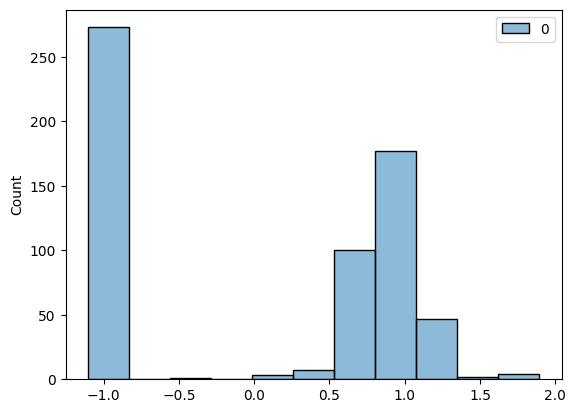

In [30]:
import seaborn as sns
sns.histplot(la_pt)

# Correlation

**In regression if you want to know the association between numerical variable and target variable we use correlation coefficient.**